# Crawling

* 웹 페이지에 접속해서 정보를 찾는 과정을 프로그램을 통해 찾아 수집하고 원하는 형태에 맞게 가공하는 모든 과정.

* 사이트의 운영자의 의사에 반하지 않으면 합법이고 그렇지 않으면 불법
* 사이트 디렉토리의 robots.txt파일을 보면 크롤링을 금지하는지 안하는지표시되어있음 (Disallow라는 표시 있으면 크롤링하면 안 됨)
* 웹페이지 소스 중 웹 프로그래밍 요소는 저작물로 인정될 수 있으므로 불법 복제는 저작권 침해에 해당.

In [4]:
!pip3 install BeautifulSoup4

In [5]:
!pip3 install bs4

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=d12a2fe7b1569c4dc0b04e8eab73498122c4bb672aadda841604fb8f36ee816b
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [11]:
!pip3 install requests

In [12]:
!pip3 install pandas

In [13]:
!pip3 install plotly

In [14]:
!pip3 install lxml

# URL

- 자원이 어디 있는지를 알려주기 위한 규약
- 흔히 웹 사이트 주소로 알고 있지만, URL은 웹 사이트 주소뿐만 아니라 컴퓨터 네트워크상의 자원을 모두 나타낼 수 있음
- 그 주소에 접속하려면 해당 URL에 맞는 프로토콜을 알아야 하고, 그와 동일한 프로토콜로 접속(FTP 프로토콜인 경우에는 FTP 클라이언트를 이용해야 하고, HTTP인 경우에는 웹 브라우저를 이용해야 한다. 텔넷의 경우에는 텔넷 프로그램을 이용해서 접속)

# HTTP(HyperText Transfer Protocol)

* http는 80 포트사용
* http는 443 (http + security) 포트사용

##  **HTTP 처리방식**

- GET : 리소스 취득 (? 뒤에 이어붙이는 방식 - 작은 값들)
- POST : 리소스 생성 (Body에 붙이는 방식 - 상대적으로 큰 용량)
- PUT : 리소스 수정 요청
- DELETE : 리소스 삭제 요청
- HEAD : HTTP 헤더 정보만 요청, 해당 자원 존재 여부 확인 목적
- OPTIONS : 웹서버가 지원하는 메소드 종류 반환 요청
- TRACE : 요청 리소스가 수신되는 경로 확인
- CONNECT : 요청 리소스에 대해 양방향 연결 시작

In [15]:
import requests
import bs4

In [18]:
print(requests.__version__) # requests 버전 확인

2.31.0


In [19]:
bs4.__version__ # bs4 버전 확인

'4.11.2'

In [21]:
import requests

html = requests.get('https://www.paullab.co.kr/stock.html')
html

<Response [200]>

In [ ]:
print(type(html))
print(dir(html))
# print(html.encoding)
# print(html.headers)
# print(html.json)
# print(html.raw)
print(html.text) # 제일 잘 사용 하는거

In [ ]:
html.encoding = 'utf-8' # 한글 출력 하고 싶은면 이걸로 강제 인코딩 해야 한다.

In [36]:
# from requests.models import Response
params = {'pa1': 'val1', 'pa2': 'value2'}
response = requests.get('http://www.paullab.co.kr', params=params)
# response.text
response.url

'https://paullab.co.kr/?pa1=val1&pa2=value2'

In [ ]:
# 조회수 올리는 코드 (사용 시 불법이 될수도?)
import time

for i in range(10):
    requests.get('https://사이트')
    time.sleep(1)

* requests를 이용한 크롤링

In [44]:
import requests
from bs4 import BeautifulSoup

response = requests.get('http://www.paullab.co.kr/stock.html')
response.encoding = 'utf-8'
html = response.text

soup = BeautifulSoup(html, 'html.parser') # 원하는 문자열로 잘라줌

* 특정 페이지의 소스코드를 파일로 저장

        *사이트의 위변조 여부 확인


In [72]:
import requests
from bs4 import BeautifulSoup

response = requests.get('http://www.paullab.co.kr/stock.html')
response.encoding = 'utf-8'
html = response.text
# url 코드를 파일로 저장
f = open('test.html', 'w', encoding='utf-8')
f.write(html)
f.close()

In [ ]:
print(soup.prettify()) # html 문서형식으로 출력

In [81]:
soup.title

<title>Document</title>

In [ ]:
soup.head

In [46]:
soup.select('#update')

[<span id="update">update : 20.12.30 / 해외 크롤링이 Block되어 있으므로 크롤링이 안되시는 분은 이 URL(http://paullab.synology.me/stock.html)을 사용하세요.</span>]

In [78]:
soup.select('#_market_sum')
soup.select('#_market_sum')[0]
soup.select('#_market_sum')[0].text

'349조 2,323'

In [116]:
# 문제
# 2019.10.23 거래량 출력
soup.select('.num')[5].text
#포털사는 클래스 이름을 주기적으로 변경합니다.
# 이거는 곳 실행이 안될 코드입니다.

In [ ]:
날짜 = []
종가 = []

for i in twoStep:
    날짜.append(i.select('td')[0].text)
    종가.append(int(i.select('td')[1].text.replace(',', '')))

In [68]:
!pip3 install requests

In [69]:
!pip3 install beautifulsoup4

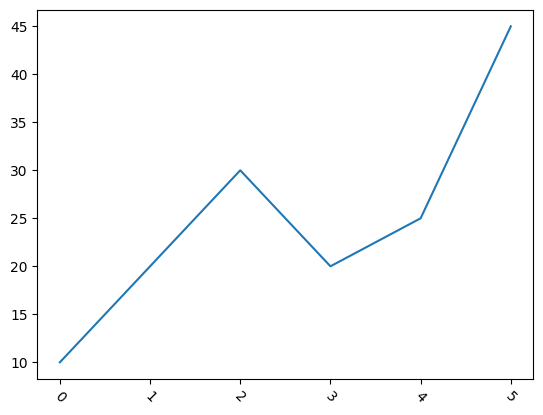

In [76]:
import matplotlib.pyplot as plt

plt.plot([10, 20, 30, 20, 25, 45])
plt.xticks(rotation = -45 ) # y 축 변수 기울기 설정
plt.show()

# 과제

## 문제1
---
https://www.paullab.co.kr/stock.html 서비스를 크롤링하여 제주코딩베이스캠프 연구원의 2019년 10월 총 거래량을 구해주세요.

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

response = requests.get('http://www.paullab.co.kr/stock.html')
html = response.text
print(html)
# soup = BeautifulSoup(html, 'html.parser')


# soup.select(' .main')[2]
# soup.select('date')
# soup.select('h2')



In [164]:
import re
p = re.compile(r'[a-zA-Z0-9+-\_.]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+')
a = re.findall(html, text)

print(a)
# result = []
# for i in p.findall(html):
#     if i ==

[]


In [19]:
# 참조 1
import requests
from bs4 import BeautifulSoup

response = requests.get('https://www.paullab.co.kr/stock.html')
html = response.text
soup = BeautifulSoup(html, 'html.parser')

# "table" 태그와 클래스 이름이 "table table-hover"인 요소를 찾습니다.
table = soup.find('table', {'class': 'table table-hover'})

# 테이블에서 모든 행을 찾습니다.
rows = table.find_all('tr')

total_volume_october_2019 = 0
index = 0

while index < len(rows):
    # 각 행에서 모든 열을 찾습니다.
    cols = rows[index].find_all('td')

    # 만약 열이 있고, 날짜가 2019년 10월인 경우만 처리합니다.
    if cols and '2019.10' in cols[0].get_text(strip=True):
        volume_str = cols[6].get_text(strip=True)

        # 쉼표(,) 제거 후 정수로 변환하여 총 거래량에 더합니다.
        total_volume_october_2019 += int(volume_str.replace(',', ''))

    index += 1

print(f"제주코딩베이스캠프 연구원의 2019년 10월 총 거래량: {total_volume_october_2019}")

제주코딩베이스캠프 연구원의 2019년 10월 총 거래량: 10895826


In [23]:
# 참조 2
import requests
from bs4 import BeautifulSoup

html = requests.get('https://www.paullab.co.kr/stock.html')
html.encoding = 'utf-8'
data = BeautifulSoup(html.text, 'html.parser')
tr_list = data.select('.table tbody tr')[1:]

transaction_count = 0

for i in tr_list:
    if str(i.select('td')[0].text).find('2019.10') == -1:
        break
    transaction_count += int(i.select('td')[6].text.replace(',', ''))
print(f'{transaction_count: ,}')

 10,895,826


In [20]:
# 풀이

import requests
from bs4 import BeautifulSoup
import re

# 문제1 https://www.paullab.co.kr/stock.html 서비스를 크롤링하여 제주코딩베이스캠프 연구원의 2019년 10월 총 거래량을 구해주세요.

request = requests.get('https://www.paullab.co.kr/stock.html')
html = request.text
soup = BeautifulSoup(html, 'html.parser')

i = 1
total = 0
while True:
    tr = soup.select('.main > table > tbody > tr')[i]
    month = int(tr.select('td')[0].text.split('.')[1])
    if month != 10:
        break
    sells = int(tr.select('td')[6].text.replace(',',''))
    total += sells
    i += 1
total

10895826

## 문제2
---
* html에서 태그를 제거하고 텍스트만 뽑아낼 수 있도록 해주세요.
`'<p>This is a <em>simple</em> example.</p>'`

In [154]:
s = '<p>This is a <em>simple</em> example.</p>'
print(re.sub('<[a-z/]+>','',s))

This is a simple example.


In [9]:
# 참조
data = '<p>This is a <em>simple</em> example.</p>'
s = BeautifulSoup(data, 'html.parser')
print(s.text)

'This is a simple example.'

In [10]:
# 풀이

import re
# 문제2 html에서 태그를 제거하고 텍스트만 뽑아낼 수 있도록 해주세요.
# '<p>This is a <em>simple</em> example.</p>'

s = '<p>This is a <em>simple</em> example.</p>'
print(re.sub('<[a-z/]+>','',s))

This is a simple example.


## 문제3
---
아래 텍스트에서 이메일만 추출할 수 있는 정규표현식을 만들어주세요.<br>

    '제 이메일 주소는 example1@gmail.com이고 회사 이메일 주소는 example2@gmail.com 입니다. example1로 연락을 주셨다면 제게 메시지 한 번 부탁드립니다.'

In [21]:
import re

text = '제 이메일 주소는 example1@gmail.com이고 회사 이메일 주소는 example2@gmail.com 입니다. example1로 연락을 주셨다면 제게 메시지 한 번 부탁드립니다.'
p = r'[a-zA-Z0-9+-\_.]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+'

email = re.findall(p, text)

print(email)

['example1@gmail.com', 'example2@gmail.com']


In [ ]:
# 문제3 아래 텍스트에서 이메일만 추출할 수 있는 정규표현식을 만들어주세요.
# '제 이메일 주소는 example1@gmail.com이고 회사 이메일 주소는 example2@gmail.com 입니다. example1로 연락을 주셨다면 제게 메시지 한 번 부탁드립니다.'

s = '제 이메일 주소는 example1@gmail.com이고 회사 이메일 주소는 example2@gmail.com 입니다. example1로 연락을 주셨다면 제게 메시지 한 번 부탁드립니다.'

p = re.compile('[a-zA-Z0-9]+@[a-zA-Z]+.[a-zA-Z]+')
p.findall(s)

In [22]:
# 이메일 정규표현식